## Data Pre-Processing & EDA on Mortality_Rate dataset
- The data is fetched from the following API: https://api.covid19india.org/
- The data used is real-time and the code for extracting the csv file from covid-India api is present in task-1 folder 
- The steps performed in this file are:    
    1. Data Cleaning and Data pre-processing on the dataset
    2. Statistical Analysis on data (state-wise)
    3. Summing up the daily state-wise data and plotting the graphs 
    4. Observations
    
    
- Notebook by Aditi Aggrawal 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import cv2
import plotly.io as pio


### Reading the data

In [2]:
df = pd.read_csv('./covid-india-data.csv', parse_dates=['Date'])
df.head(10)

,State,Date,Confirmed,Recovered,Deceased,Tested
0,AN,2020-03-26,1.0,NaN,NaN,NaN
1,AN,2020-03-27,6.0,NaN,NaN,NaN
2,AN,2020-03-28,9.0,NaN,NaN,NaN
3,AN,2020-03-29,9.0,NaN,NaN,NaN
4,AN,2020-03-30,10.0,NaN,NaN,NaN
5,AN,2020-03-31,10.0,NaN,NaN,NaN
6,AN,2020-04-01,10.0,NaN,NaN,NaN
7,AN,2020-04-02,10.0,NaN,NaN,NaN
8,AN,2020-04-03,10.0,NaN,NaN,NaN
9,AN,2020-04-04,10.0,NaN,NaN,NaN


### Data pre-processing

In [3]:
#Checking for NULL values
df.isna().sum()

State           0
Date            0
Confirmed     102
Recovered     776
Deceased     1818
Tested        756
dtype: int64

In [4]:
df.dropna(inplace=True)
df.Confirmed = df.Confirmed.astype(int)
df.Recovered = df.Recovered.astype(int)
df.Deceased = df.Deceased.astype(int)
df.Tested = df.Tested.astype(int)

In [5]:
df.isna().sum()

State        0
Date         0
Confirmed    0
Recovered    0
Deceased     0
Tested       0
dtype: int64

In [6]:
dict_states={'TT': 'Total', 'WB': 'West Bengal', 'DL': 'Delhi', 'KL': 'Kerala', 'PB': 'Punjab', 'AP':'Andhra Pradesh', 
             'TN': 'Tamil Nadu', 'KA': 'Karnataka', 'JK': 'Jammu and Kashmir', 'UP': 'Uttar Pradesh', 'MP': 'Madhya Pradesh', 
             'MH': 'Maharashtra', 'BR': 'Bihar', 'HR': 'Haryana', 'OR': 'Orissa', 'RJ': 'Rajasthan', 'GJ': 'Gujarat', 
             'HP': 'Himachal Pradesh', 'AS': 'Assam', 'TG': 'Telangana', 'JH': 'Jharkhand', 'ML': 'Meghalaya', 
             'UT': 'Uttarakhand', 'CH': 'Chandigarh', 'CT': 'Chhattisgarh', 'LA': 'Lakshadweep', 'TR': 'Tripura', 
             'PY': 'Pondicherry', 'GA': 'Goa', 'AR': 'Arunachal Pradesh', 'DN': 'Dadra and Nagar Haveli', 
             'NL': 'Nagaland', 'SK':'Sikkim', 'AN': 'Andaman and Nicobar Islands', 'MN': 'Manipur', 'MZ': 'Mizoram', 
             'LD': 'Lakshadweep'}
len(dict_states)

37

In [7]:
df = df.replace({'State':dict_states})
df.head(10)

,State,Date,Confirmed,Recovered,Deceased,Tested
123,Andaman and Nicobar Islands,2020-07-27,338,192,1,22548
124,Andaman and Nicobar Islands,2020-07-28,363,196,1,22925
125,Andaman and Nicobar Islands,2020-07-29,428,201,2,23217
126,Andaman and Nicobar Islands,2020-07-30,470,201,3,23615
127,Andaman and Nicobar Islands,2020-07-31,548,214,5,24038
128,Andaman and Nicobar Islands,2020-08-01,636,226,7,24308
129,Andaman and Nicobar Islands,2020-08-02,734,242,8,24580
130,Andaman and Nicobar Islands,2020-08-03,830,263,10,25034
131,Andaman and Nicobar Islands,2020-08-04,928,277,12,25492
132,Andaman and Nicobar Islands,2020-08-05,1027,326,14,25826


In [8]:
df.State.value_counts() 


Lakshadweep                    566
Total                          499
West Bengal                    479
Delhi                          479
Kerala                         479
Punjab                         478
Tamil Nadu                     477
Andhra Pradesh                 477
Karnataka                      477
Jammu and Kashmir              475
Uttar Pradesh                  475
Madhya Pradesh                 475
Maharashtra                    475
Bihar                          475
Orissa                         474
Haryana                        474
Rajasthan                      473
Gujarat                        472
Himachal Pradesh               470
Assam                          465
Telangana                      461
Jharkhand                      460
Meghalaya                      449
Uttarakhand                    449
Chandigarh                     447
Chhattisgarh                   421
Tripura                        411
Pondicherry                    409
Goa                 

In [9]:
df.columns

Index(['State', 'Date', 'Confirmed', 'Recovered', 'Deceased', 'Tested'], dtype='object')

### Data Analysis

In [10]:
df_Total = df.loc[df['State'] == 'Total']
df_Total.head(10)

,State,Date,Confirmed,Recovered,Deceased,Tested
15925,Total,2020-03-13,91,3,1,6500
15926,Total,2020-03-14,102,3,1,6500
15927,Total,2020-03-15,112,3,1,6500
15928,Total,2020-03-16,126,3,1,6500
15929,Total,2020-03-17,146,3,1,6500
15930,Total,2020-03-18,171,3,1,13125
15931,Total,2020-03-19,198,3,1,14175
15932,Total,2020-03-20,256,4,1,15404
15933,Total,2020-03-21,334,4,1,16911
15934,Total,2020-03-22,403,4,1,18127


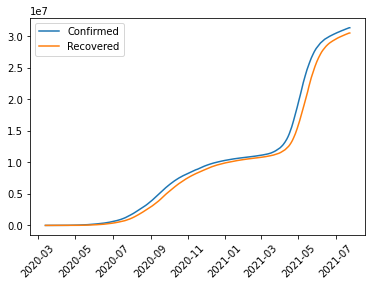

In [11]:
x=df_Total['Date']
plt.plot(x, df_Total['Confirmed'], label='Confirmed')
plt.plot(x, df_Total['Recovered'], label='Recovered')
plt.xticks(rotation=45) 

plt.legend()

plt.show()

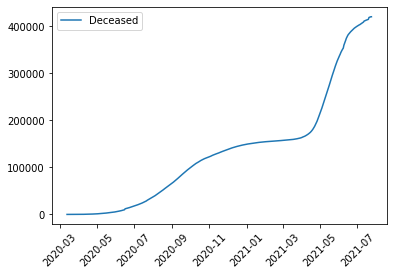

In [13]:
x=df_Total['Date']
plt.plot(x, df_Total['Deceased'], label='Deceased')
plt.xticks(rotation=45) 

plt.legend()

plt.show()

### Statistical Analysis

In [14]:
 df_stats = df[['Confirmed', 'Recovered', 'Deceased', 'Tested']]

round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Confirmed,16015.0,611494.75,2447067.21,12.0,9553.5,66677.0,339108.5,31334149.0
Recovered,16015.0,562587.06,2284194.28,1.0,6908.0,56479.0,319761.5,30496122.0
Deceased,16015.0,8238.44,32202.87,1.0,91.0,912.0,4362.5,420120.0
Tested,16015.0,9513421.86,35179855.56,659.0,193119.0,1020869.0,7621514.0,454570811.0


In [15]:
region_stats = df.groupby(['State'])[['Confirmed', 'Recovered', 'Deceased', 'Tested']].mean().reset_index()
region_stats = round(region_stats,2)

region_stats

,State,Confirmed,Recovered,Deceased,Tested
0,Andaman and Nicobar Islands,4959.15,4723.21,68.54,2.182138e+05
1,Andhra Pradesh,748396.17,703556.61,5656.43,9.483778e+06
2,Arunachal Pradesh,15961.53,14649.71,57.34,3.708222e+05
3,Assam,192779.92,178071.88,1168.54,5.411253e+06
4,Bihar,254135.42,239467.44,1980.66,1.414074e+07
5,Chandigarh,21795.60,20172.31,297.70,2.030975e+05
6,Chhattisgarh,346163.05,317922.20,4324.12,3.933914e+06
7,Dadra and Nagar Haveli,4623.57,4340.64,2.50,6.711193e+04
8,Delhi,545688.66,517808.59,9378.54,8.106347e+06
9,Goa,63344.13,57980.25,985.21,4.476908e+05


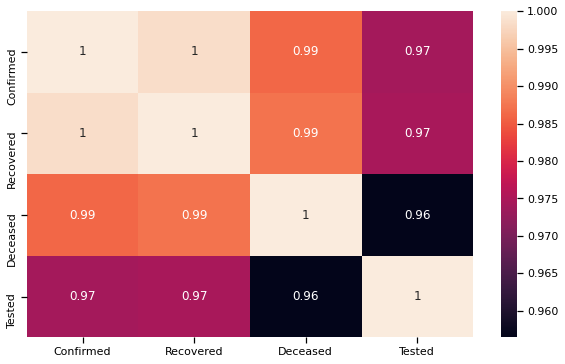

In [16]:
heat_maps = df[['Confirmed', 'Recovered', 'Deceased', 'Tested']]
heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True);

### Plotting and Comparing Data of different states 

In [26]:
df_graph = df.groupby('State')['Confirmed'].mean().reset_index()  
df_recovered = df.groupby('State')['Recovered'].mean().reset_index()
df_deceased = df.groupby('State')['Deceased'].mean().reset_index()
df_tested = df.groupby('State')['Tested'].mean().reset_index()

df_graph['Recovered'] = df_recovered['Recovered']
df_graph['Deceased'] = df_deceased['Deceased']
df_graph['Tested'] = df_tested['Tested']
df_graph.columns = ['State','Total Confirmed','Total Recovered','Total Deceased','Total Tested']

idx = df_graph[df_graph['State']=='Total'].index
df_graph.drop(idx, inplace=True)
df_graph.head(2)

,State,Total Confirmed,Total Recovered,Total Deceased,Total Tested
0,Andaman and Nicobar Islands,4959.154696,4723.212707,68.544199,2.182138e+05
1,Andhra Pradesh,748396.167715,703556.614256,5656.425577,9.483778e+06


In [27]:
data=df_graph[['State','Total Confirmed','Total Recovered','Total Deceased','Total Tested']].sort_values(by='Total Confirmed',ascending=False)
data.set_index('State',inplace=True)
data.head(7)

,Total Confirmed,Total Recovered,Total Deceased,Total Tested
State,,,,
Maharashtra,2.134992e+06,1.926354e+06,45212.452632,1.368021e+07
Karnataka,9.151696e+05,8.247769e+05,11385.941300,1.273467e+07
Kerala,8.295493e+05,7.554571e+05,3305.594990,7.880530e+06
Tamil Nadu,8.088069e+05,7.525424e+05,11116.316562,1.264777e+07
Andhra Pradesh,7.483962e+05,7.035566e+05,5656.425577,9.483778e+06
Uttar Pradesh,5.934352e+05,5.497935e+05,7860.875789,2.148492e+07
Delhi,5.456887e+05,5.178086e+05,9378.542797,8.106347e+06


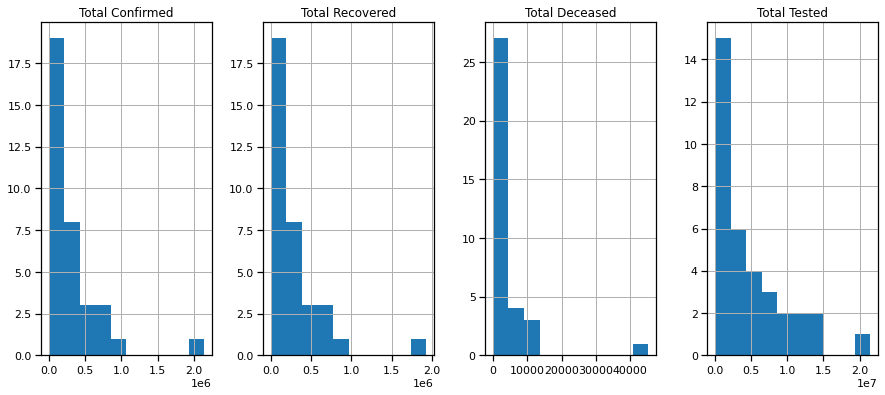

In [28]:
data.hist(figsize=(15,30),layout=(4,4))
plt.show()

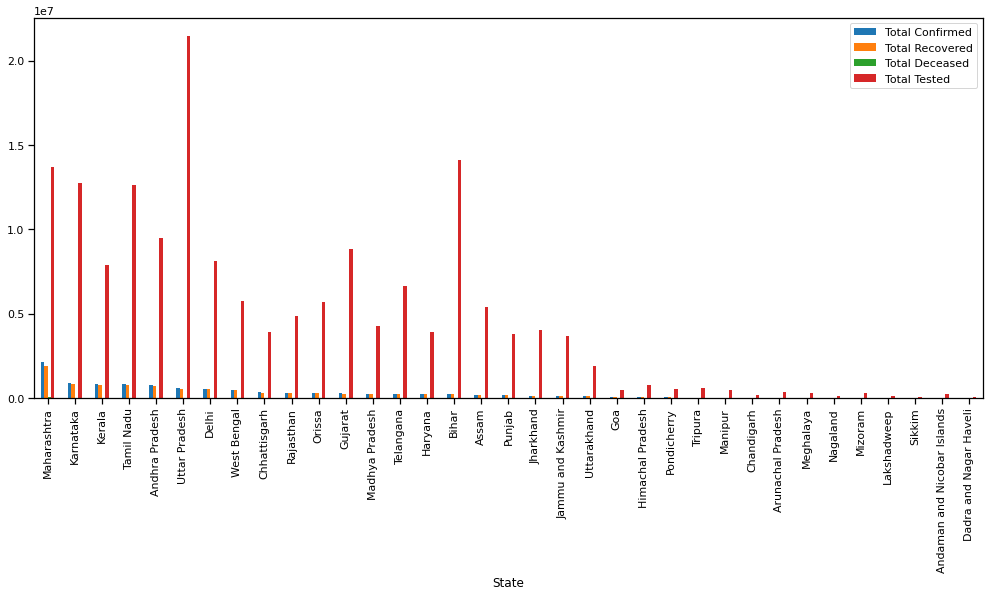

In [29]:
data.plot.bar(figsize=(17,7))  
plt.show()

In [30]:
df_graph['percentage tested positive'] = round(df_graph['Total Confirmed']/df_graph['Total Tested'],4)*100
df_graph['percentage died'] = round(df_graph['Total Deceased']/df_graph['Total Confirmed'],4)*100
df_graph['percentage recovered'] = round(df_graph['Total Recovered']/df_graph['Total Confirmed'],4)*100

In [31]:
df_graph.head(10)

,State,Total Confirmed,Total Recovered,Total Deceased,Total Tested,percentage tested positive,percentage died,percentage recovered
0,Andaman and Nicobar Islands,4959.154696,4723.212707,68.544199,2.182138e+05,2.27,1.38,95.24
1,Andhra Pradesh,748396.167715,703556.614256,5656.425577,9.483778e+06,7.89,0.76,94.01
2,Arunachal Pradesh,15961.531646,14649.711392,57.341772,3.708222e+05,4.30,0.36,91.78
3,Assam,192779.916129,178071.881720,1168.544086,5.411253e+06,3.56,0.61,92.37
4,Bihar,254135.418947,239467.435789,1980.661053,1.414074e+07,1.80,0.78,94.23
5,Chandigarh,21795.601790,20172.306488,297.695749,2.030975e+05,10.73,1.37,92.55
6,Chhattisgarh,346163.054632,317922.197150,4324.123515,3.933914e+06,8.80,1.25,91.84
7,Dadra and Nagar Haveli,4623.570681,4340.638743,2.502618,6.711193e+04,6.89,0.05,93.88
8,Delhi,545688.655532,517808.594990,9378.542797,8.106347e+06,6.73,1.72,94.89
9,Goa,63344.128463,57980.249370,985.206549,4.476908e+05,14.15,1.56,91.53


In [32]:
plot_positive = df_graph.sort_values('Total Confirmed')
plot_deceased = df_graph.sort_values('Total Deceased')
plot_recovered = df_graph.sort_values('Total Recovered')
plot_positive_per = df_graph.sort_values('percentage tested positive')
plot_died_per = df_graph.sort_values('percentage died')
plot_recovered_per = df_graph.sort_values('percentage recovered')

In [33]:
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [34]:
pip install -c plotly plotly -orca


Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\aditi_softwares\python\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\aditi_softwares\python\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\aditi_softwares\python\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\aditi_softwares\python\python.exe -m pip install [options] [-e] <local project path> ...
  c:\aditi_softwares\python\python.exe -m pip install [options] <archive url/path> ...

no such option: -o


In [55]:
fig = px.bar(plot_positive, x='State',y='Total Confirmed', color='Total Confirmed',
            title='population tested positive in each state',template='xgridoff')

fig.show()  

In [58]:
fig = px.bar(plot_deceased, x='State',y='Total Deceased', color='Total Deceased',
            title='population who died in each state',template='xgridoff')

fig.show()  

In [57]:
fig = px.bar(plot_recovered, x='State',y='Total Recovered', color='Total Recovered',
            title='population that successfully recovered in each state',template='xgridoff')

fig.show()  

In [39]:
fig = px.bar(plot_positive_per, x='State',y='percentage tested positive',color='percentage tested positive',
            title='percentage of population tested positive in each state',template='ggplot2')

fig.show()  

In [41]:
fig = px.bar(plot_died_per, x='State',y='percentage died',color='percentage died',
            title='percentage of corona positive who died in each state',template='ggplot2')

fig.show()

In [43]:
fig = px.bar(plot_recovered_per, x='State',y='percentage recovered',color='percentage recovered',
            title='percentage of corona positive who successfully recovered in each state',template='ggplot2')

fig.show()

In [44]:
def sort_impact(x):
    if x <= 0.05:
        return 'impacted States'
    elif x <= 0.2:
        return 'hard impacted States'
    elif x <= 0.3:
        return 'harder impacted States'
    elif x <= 0.4:
        return 'hardest impacted States'
    return x  

In [49]:
plot_positive['impact status'] = plot_positive['percentage tested positive'].apply(lambda x:sort_impact(x))
plot_deceased['impact status'] = plot_deceased['percentage died'].apply(lambda x:sort_impact(x))
plot_recovered['impact status'] = plot_recovered['percentage recovered'].apply(lambda x:sort_impact(x))

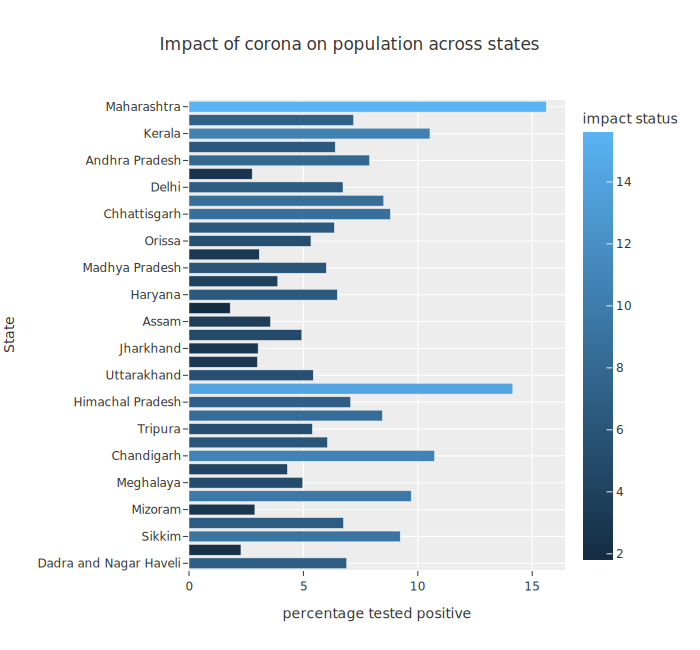

In [50]:
graph = px.bar(plot_positive, y='State',x='percentage tested positive',color='impact status',
            title='Impact of corona on population across states',template='ggplot2',height=650)

graph.show(renderer="svg")

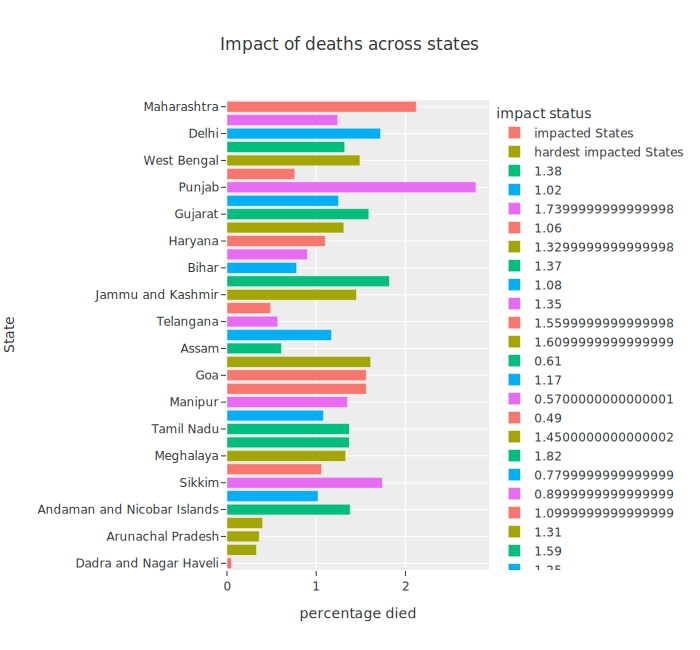

In [52]:
graph = px.bar(plot_deceased, y='State',x='percentage died',color='impact status',
            title='Impact of deaths across states',template='ggplot2',height=650)

graph.show(renderer="svg")

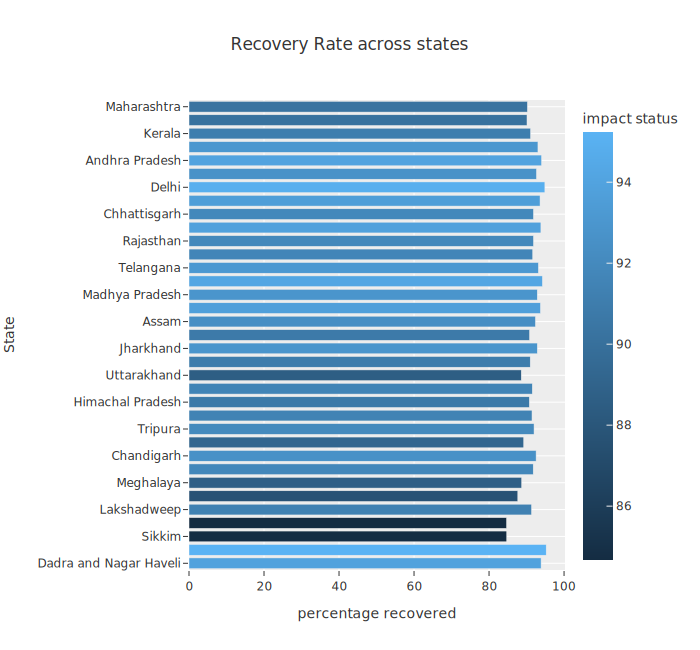

In [53]:
graph = px.bar(plot_recovered, y='State',x='percentage recovered',color='impact status',
            title='Recovery Rate across states',template='ggplot2',height=650)

graph.show(renderer="svg")

### Observations
- The confirmed cases, recovered and deceased cases have mostly been increasing since March'20 with some drop at certain times
- <b>Maximum number of</b> Corona Positive Cases/Deaths/Recovered Cases have been observed in <b>Maharashtra</b>
- <b>Minimum number of</b>  Corona Positive Cases/Deaths/Recovered Cases have been observed in <b>Dadra and Nagar Haveli</b>
- <b>Maximum Percentage of</b> Tested cases who turned out to be corona positive cases has been observed in <b>Maharashtra</b>
- <b>Minimum Percentage of</b> Tested cases who turned out to be corona positive cases has been observed in <b>Bihar</b>
- <b>Maximum Percentage of</b> Corona positive cases who died has been observed in <b>Punjab</b>
- <b>Minimum Percentage of</b> Corona positive cases who died has been observed in <b>Dadra and Nagar Haveli</b>
- <b>Maximum Percentage of</b> Corona positive cases who recovered has been observed in <b>Andaman and Nicobar Islands</b>
- <b>Minimum Percentage of</b> Corona positive cases who recovered has been observed in <b>Mizoram and Sikkim</b>